Epoch 1/10


c:\Users\LAB-USER-01\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3484 - loss: 1.1011 - val_accuracy: 0.3313 - val_loss: 1.1125
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3609 - loss: 1.0935 - val_accuracy: 0.3063 - val_loss: 1.1099
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3938 - loss: 1.0885 - val_accuracy: 0.3250 - val_loss: 1.1030
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3859 - loss: 1.0871 - val_accuracy: 0.3125 - val_loss: 1.1083
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4141 - loss: 1.0798 - val_accuracy: 0.2937 - val_loss: 1.1066
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4078 - loss: 1.0769 - val_accuracy: 0.3562 - val_loss: 1.1084
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4250 - loss: 1.0723 - val_accuracy: 0.2625 - val_loss: 1.1118
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4266 - loss: 1.0722 - val_accuracy: 0.2875 - val_loss: 1.1137
Epo

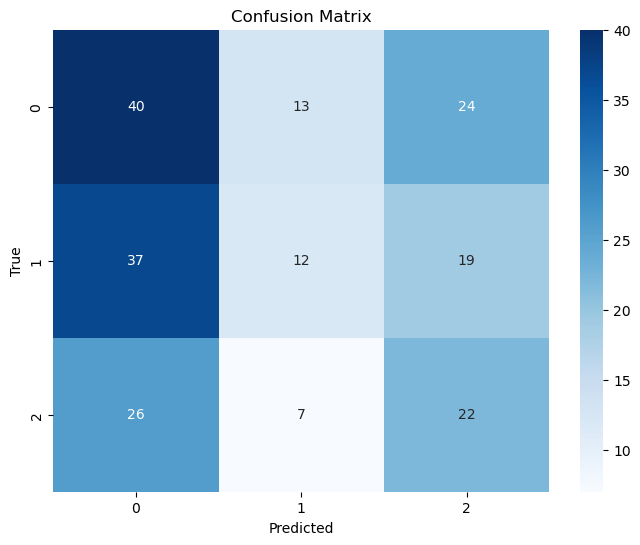

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Prepare data (replace X and y with your actual data variables)
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Example: X, y = ... # your data here
# For demonstration, let's create dummy data (remove this in your real code)
import numpy as np
num_samples = 1000
num_features = 20
num_classes = 3
X = np.random.rand(num_samples, num_features)
y = np.random.randint(0, num_classes, size=(num_samples,))

# Split data
X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train_raw, num_classes=num_classes)
y_test = to_categorical(y_test_raw, num_classes=num_classes)

# Model Training and Evaluation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple model (adjust input_dim and output units as needed)
model = Sequential([
	Dense(128, activation='relu', input_dim=X_train.shape[1]),
	Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train (fine-tune) the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Classification report
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()